## 单只绩效分析

In [36]:
from single_nav_analysis import NavAnalysisConfig, SingleNavAnalysis
from pathlib import Path
import pandas as pd
import numpy as np

nav_analysis_config = NavAnalysisConfig(
    bench_data_path=Path(r"C:\Euclid_Jie\barra\src\nav_analysis\index_data.csv"),
    nav_data_path=Path(r"C:\Users\Ouwei\Desktop\相生9号私募证券投资基金.xlsx"),
    # nav_data_path=Path(r"C:\Users\Ouwei\Desktop\管理人单页\SLD035-同温层量化阿尔法1号.xlsx"),
    # nav_data_path=Path(r"C:\Euclid_Jie\barra\src\nav_analysis\FOF\FOF_Markowitz净值.csv"),
    # begin_date=np.datetime64("2021-12-31"),
    # end_date=np.datetime64("2024-12-09"),
    open_html=True,
    # benchmark="SHSE.000905",
)
demo = SingleNavAnalysis(nav_analysis_config)
demo.analysis()
# demo.attraction_analysis(
#     barra_rtn_df=pd.read_csv(r"barra_data\cne5.csv"),
#     show=True,
#     R2=True,
# )
demo.export_html(save=True)
demo

开始读取相生9号私募证券投资基金净值数据
原始数据时间区间为：2021-03-05 ~ 2024-10-18
本次统计时间区间为：2021-03-05 ~ 2024-10-18
html路径为：C:\Users\Ouwei\Desktop\20210305_20241018_相生9号私募证券投资基金_nav_analysis.html


相生9号私募证券投资基金净值分析[D]：2021-03-05 ~ 2024-10-18

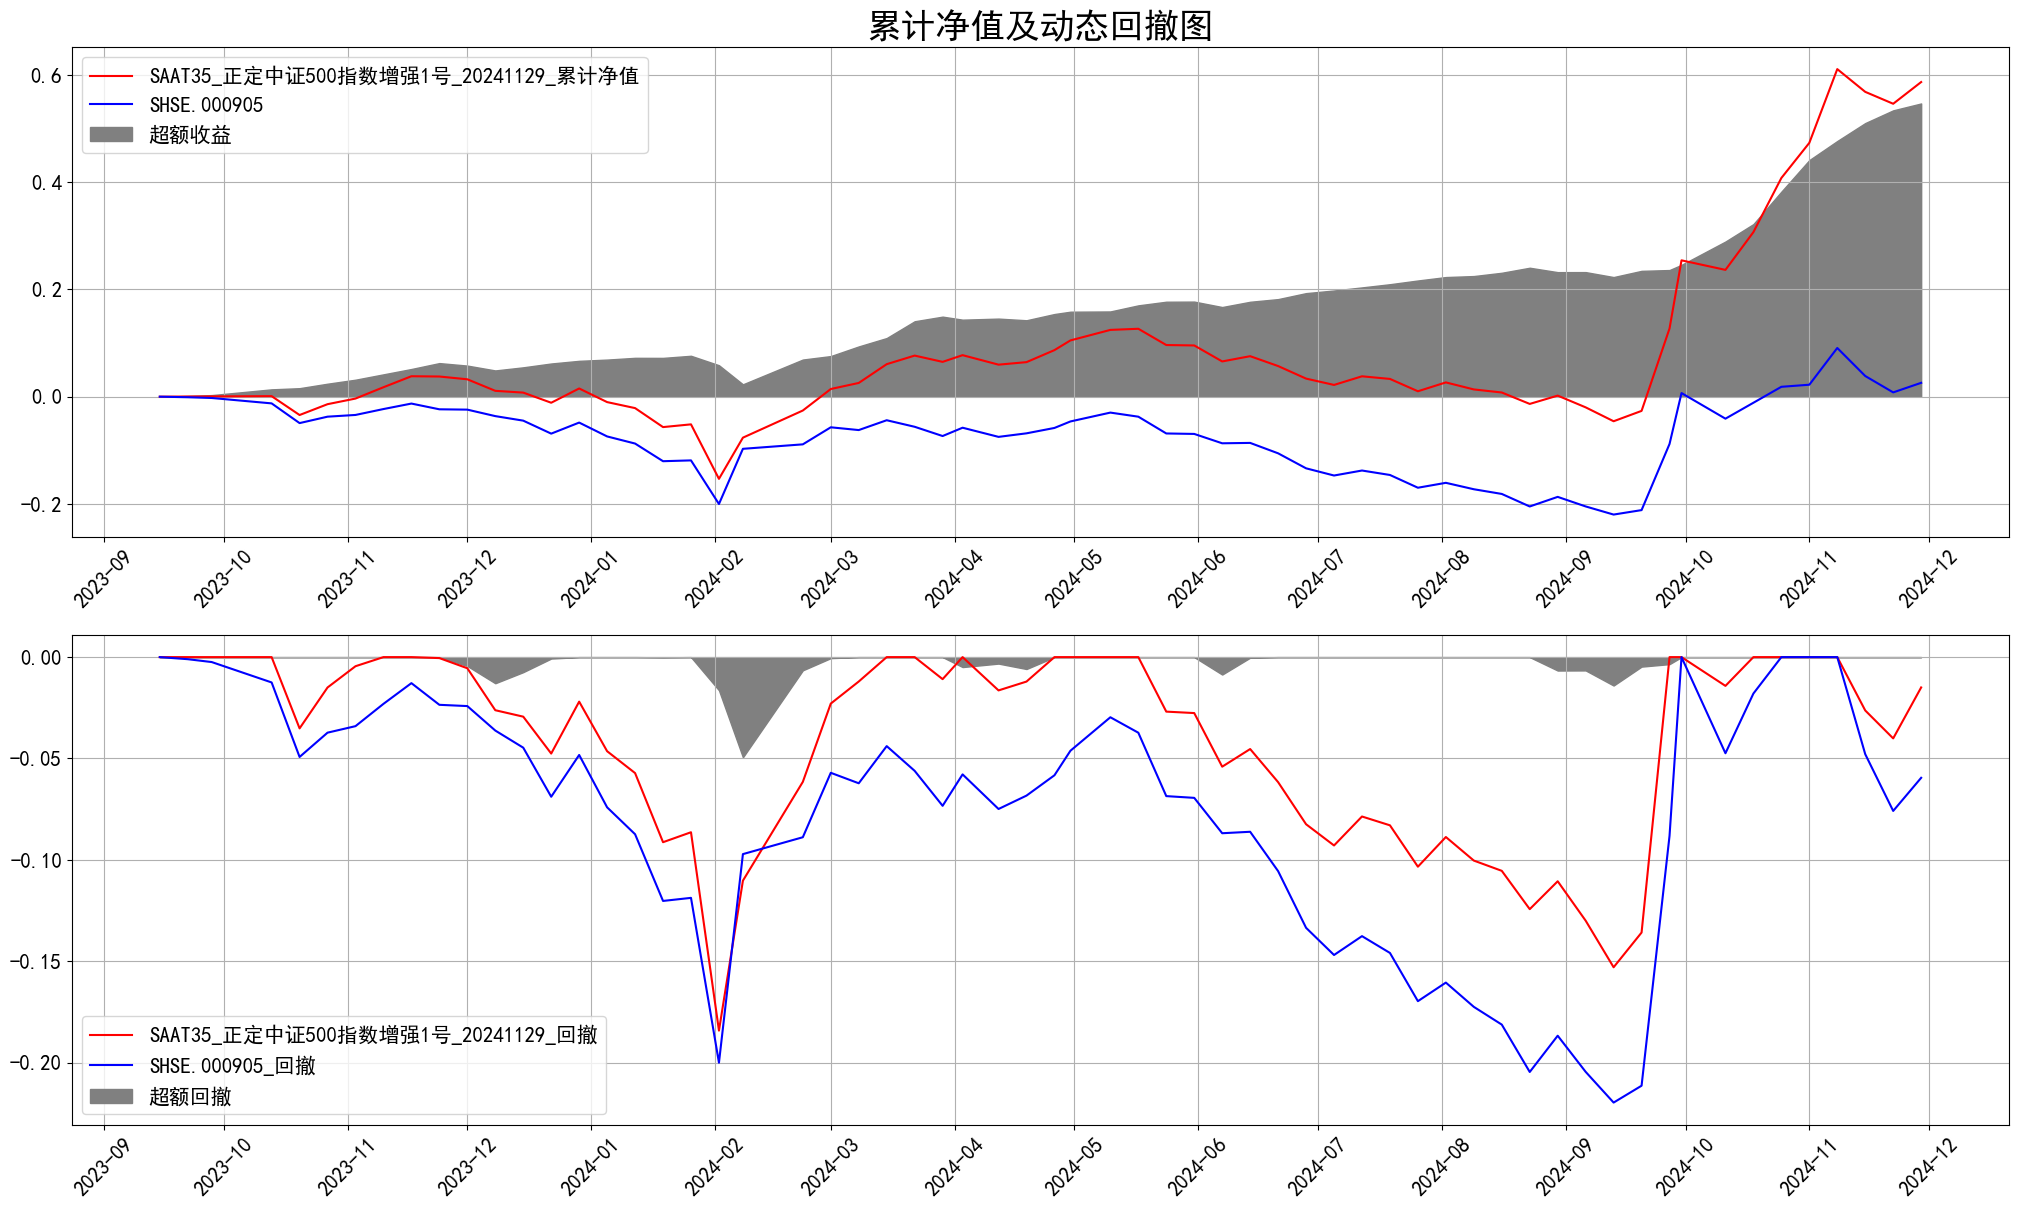

In [5]:
demo.plot("upper")

In [4]:
# demo.monthly_rtn_df.to_csv(
#     r"C:\Users\Ouwei\Desktop\monthly_rtn.csv", index=True, encoding="utf_8_sig"
# )
demo.monthly_rtn_df

,1月,2月,3月,4月,5月,6月,7月,8月,9月,10月,11月,12月,年度总收益,月度胜率
FOF净值_2023,,0.140%,0.490%,0.960%,0.750%,1.110%,0.110%,0.470%,0.820%,0.680%,-0.770%,0.910%,5.780%,91.670%
FOF净值_2024,1.140%,0.640%,1.540%,0.160%,0.890%,0.900%,0.630%,0.320%,0.240%,0.730%,1.180%,,8.690%,100.000%


In [5]:
demo.metrics_table

,年化收益率,年化波动率,最大回撤,夏普比率,卡玛比率,开始日期,结束日期,持续天数,修复日期,修复天数
FOF净值,8.207%,2.711%,-1.755%,3.027,4.677564,2024-08-23,2024-09-27,35,2024-09-30,3


In [6]:
demo.backword_analysis_df

,区间收益率,年化收益率,区间波动率,年化波动率,夏普比率,最大回撤,卡玛比率,begin_date,end_date
FOF净值_1M,1.238%,13.652%,0.157%,1.130%,12.082,0.000%,inf,2024-11-01,2024-11-29
FOF净值_3M,2.160%,8.259%,0.742%,5.352%,1.543,-1.635%,5.052911,2024-08-30,2024-11-29
FOF净值_6M,4.062%,7.970%,0.534%,3.848%,2.071,-1.755%,4.542614,2024-05-31,2024-11-29
FOF净值_12M,9.412%,9.412%,0.451%,3.255%,2.892,-1.755%,5.364476,2023-12-01,2024-11-29
FOF净值_YTD,8.692%,9.449%,0.463%,3.341%,2.828,-1.755%,5.385679,2023-12-29,2024-11-29


## 自动生成index.html

In [8]:
from pathlib import Path


def generate_index_html(folder_path: Path):
    # 获取目录及其子目录中的所有 HTML 文件
    html_files = folder_path.rglob("*.html")
    print(html_files)

    # 创建一个新的 index.html 文件
    with open(folder_path.joinpath("index.html"), "w", encoding="utf-8") as f:
        f.write(
            """<html>
<head>
<meta charset="UTF-8">
<title>Value over Time</title>
</head>
<body>"""
        )

        # 创建一个集合来存储已经处理过的文件夹，避免重复创建链接
        processed_folders = set()
        # 为每个 HTML 文件创建一个链接
        for html_file in html_files:
            if html_file.name == "index.html":
                continue
            relative_path = html_file.relative_to(folder_path)
            # 如果文件夹还没有被处理过，为文件夹创建一个链接
            if html_file.parent not in processed_folders:
                f.write(f"<h2><a>{html_file.parent.name}</a></h2>\n")
                processed_folders.add(html_file.parent)

            # 创建HTML文件的链接
            f.write(
                f'<a href="{relative_path}">{relative_path.name.replace("_nav_analysis","")}</a><br/>\n'
            )

        f.write("</body>\n</html>")


# 使用函数
generate_index_html(Path(r"C:\Euclid_Jie\barra\submodule\nav_analysis\docs"))

<generator object Path.rglob at 0x0000016DAF3FFCD0>


## 双庆backword analysis 需求

In [19]:
from utils import backword_analysis
import pandas as pd

nav_data = pd.read_excel(r"C:\Users\Ouwei\Desktop\nav_data\0829双庆\nav_data.xlsx")
# 截取时间
nav_data = nav_data[nav_data["日期"] >= pd.to_datetime("2019-12-30")]
nav_data.set_index("日期", inplace=True)
nav_data = nav_data.ffill(limit_area="inside")

In [57]:
out = pd.DataFrame()
for name in nav_data.columns:
    single_nav_data = nav_data[name].reset_index(drop=False)
    single_nav_data = single_nav_data[~single_nav_data[name].isna()]
    if len(single_nav_data) < 10:
        continue
    res = backword_analysis(
        single_nav_data[name].values, single_nav_data["日期"].values, freq="W"
    ).reset_index(drop=False)
    res["产品"] = name
    out = pd.concat([out, res], axis=0)
out["策略类型"] = out["产品"].apply(lambda x: x.split("_")[-1])

In [58]:
out = out[out["backword months"].isin(["12M", "24M", "36M"])]
out = out[
    ["策略类型", "产品", "backword months", "年化收益率", "年化波动率", "夏普比率"]
]

,策略类型,产品,backword months,年化收益率,年化波动率,夏普比率
3,期现套利,0_博普日添月益_期现套利,12M,8.483%,1.395%,6.080
4,期现套利,0_博普日添月益_期现套利,24M,6.714%,1.348%,4.980
5,期现套利,0_博普日添月益_期现套利,36M,5.890%,1.717%,3.431
3,1000中性,0_麦迪生利锐联中性对冲1号_1000中性,12M,12.449%,5.925%,2.101
3,500指增,0_超量子中证500增强2号_500指增,12M,-5.693%,24.438%,-0.233
...,...,...,...,...,...,...
3,可转债套利,2_悬铃稳健金选1号_可转债套利,12M,-2.845%,7.960%,-0.357
3,指增,2_弈倍虎鲸_指增,12M,-13.005%,23.790%,-0.547
4,指增,2_弈倍虎鲸_指增,24M,-10.528%,20.929%,-0.503
5,指增,2_弈倍虎鲸_指增,36M,-5.651%,19.902%,-0.284


In [65]:
year = 1
res = pd.DataFrame()
for i in ["12M", "24M", "36M"]:
    data_i = out[out["backword months"] == i]
    data_i = data_i.drop("backword months", axis=1)
    data_i = data_i.rename(
        {
            "年化收益率": f"过去{year}_年化收益率",
            "年化波动率": f"过去{year}_年化波动率",
            "夏普比率": f"过去{year}_夏普比率",
        },
        axis=1,
    )
    year += 1
    res = pd.concat([res, data_i])

In [75]:
year = 3
data_i = out[out["backword months"] == "36M"]
data_i = data_i.drop("backword months", axis=1)
data_i = data_i.rename(
    {
        "年化收益率": f"过去{year}_年化收益率",
        "年化波动率": f"过去{year}_年化波动率",
        "夏普比率": f"过去{year}_夏普比率",
    },
    axis=1,
)

In [76]:
data_3 = data_i.copy()

In [78]:
res = data_1.merge(data_2, on=["策略类型", "产品"], how="left")
res = res.merge(data_3, on=["策略类型", "产品"], how="left")

In [68]:
res.sort_values(["策略类型", "产品"]).to_csv(
    r"C:\Users\Ouwei\Desktop\res_backword_analysis.csv",
    index=False,
    encoding="utf_8_sig",
)

In [ ]:
out.to_csv(
    r"C:\Users\Ouwei\Desktop\backword_analysis.csv", index=False, encoding="utf-8-sig"
)

## 多只对比

In [14]:
from compare_nav_analysis import NavAnalysisConfig, CompareNavAnalysis
from pathlib import Path
import numpy as np

nav_analysis_config = NavAnalysisConfig(
    bench_data_path=Path(r"C:\Euclid_Jie\barra\src\nav_analysis\index_data.csv"),
    nav_data_path=[
        # Path(
        #     r"C:\Users\Ouwei\Desktop\nav_data\六禾光辉岁月产品净值表.xlsx"
        # ),
        # Path(
        #     r"C:\Users\Ouwei\Desktop\nav_data\六禾致谦产品净值表.xlsx"
        # ),
        # i
        # for i in Path(
        #     r"C:\Euclid_Jie\barra\src\nav_analysis\FOF"
        # ).rglob("*.xlsx")
    ],
    # begin_date=np.datetime64("2024-01-01"),
    open_html=True,
    benchmark="SHSE.000905",
)
demo = CompareNavAnalysis(nav_analysis_config, strip_date=False)
demo.anlysis()
demo.export_html(save=True)

正在加载HN500完整净值数据
正在加载幻方500S数据
正在加载九坤500B-SX1396数据
正在加载宽德500S-SVN545数据
正在加载衍复500S数据
HN500完整净值，原始数据时间区间为：2019-12-30 - 2024-12-06
幻方500S，原始数据时间区间为：2021-02-10 - 2024-11-29
九坤500B-SX1396，原始数据时间区间为：2017-11-24 - 2024-11-29
宽德500S-SVN545，原始数据时间区间为：2022-11-04 - 2024-11-29
衍复500S，原始数据时间区间为：2022-07-08 - 2024-11-29
本次统计时间区间为：2022-11-04 ~ 2024-11-29
开始读取HN500完整净值净值数据
原始数据时间区间为：2019-12-30 ~ 2024-12-06
本次统计时间区间为：2022-11-04 ~ 2024-11-29
开始读取幻方500S净值数据
原始数据时间区间为：2021-02-10 ~ 2024-11-29
本次统计时间区间为：2022-11-04 ~ 2024-11-29
开始读取九坤500B-SX1396净值数据
无法推断频率, 将自动转为周度
原始数据时间区间为：2017-11-24 ~ 2024-11-29
本次统计时间区间为：2022-11-04 ~ 2024-11-29
开始读取宽德500S-SVN545净值数据
原始数据时间区间为：2022-11-04 ~ 2024-11-29
本次统计时间区间为：2022-11-04 ~ 2024-11-29
开始读取衍复500S净值数据
原始数据时间区间为：2022-07-08 ~ 2024-11-29
本次统计时间区间为：2022-11-04 ~ 2024-11-29
html路径为：C:\Users\Ouwei\Desktop\nav_data\净值库1129\按策略分\500增强\20221104_20241129_compare_nav_analysis.html


In [2]:
demo.metrics_table.sort_values(by="夏普比率", ascending=False)

,年化收益率,年化波动率,最大回撤,夏普比率,卡玛比率,开始日期,结束日期,持续天数,修复日期,修复天数
辰元优选稳健,7.610%,1.088%,-0.289%,6.993,26.288913,2024-01-05,2024-01-12,7,2024-01-19,7.0
SVM785_爱凡哲AH多空1号,16.560%,4.127%,-0.570%,4.012,29.069844,2024-10-11,2024-10-18,7,2024-11-22,35.0
致达萬贝,64.760%,16.141%,-8.407%,4.012,7.702743,2024-03-22,2024-04-26,35,2024-08-02,98.0
泛涵正元2号,17.988%,5.785%,-0.689%,3.110,26.103100,2024-04-15,2024-09-19,157,2024-09-27,8.0
富犇尊享稳进1号,12.127%,4.159%,-2.762%,2.916,4.389924,2024-08-30,2024-09-27,28,NaN,NaN
微观博易春枫,8.994%,4.187%,-2.347%,2.148,3.832252,2024-07-26,2024-09-27,63,2024-10-11,14.0
衍复春晓,5.981%,12.623%,-8.238%,0.474,0.725943,2024-01-26,2024-02-08,13,2024-03-29,50.0
SB5534_金和至信稳健12号,8.348%,26.008%,-11.982%,0.321,0.696768,2024-10-08,2024-10-17,9,NaN,NaN


In [3]:
demo.monthly_rtn_df

,1月,2月,3月,4月,5月,6月,7月,8月,9月,10月,11月,年度总收益,月度胜率
SB5534_金和至信稳健12号_2024,0.800%,2.440%,-0.030%,0.460%,0.190%,0.140%,0.500%,0.280%,10.890%,-8.390%,0.490%,7.040%,83.330%
SVM785_爱凡哲AH多空1号_2024,2.940%,3.150%,1.010%,-0.330%,0.910%,0.870%,1.060%,0.690%,0.570%,2.480%,0.340%,14.520%,91.670%
辰元优选稳健_2024,0.360%,0.440%,0.770%,0.690%,0.620%,0.660%,0.270%,0.770%,0.620%,0.790%,0.520%,6.700%,100.000%
泛涵正元2号_2024,0.740%,2.150%,0.530%,-0.100%,-0.060%,-0.180%,0.010%,-0.250%,3.500%,7.540%,0.520%,15.060%,66.670%
富犇尊享稳进1号_2024,0.310%,0.310%,3.260%,1.380%,2.140%,1.520%,0.660%,1.210%,-2.760%,0.380%,1.890%,10.660%,91.670%
微观博易春枫_2024,1.240%,2.540%,0.790%,-0.250%,0.950%,0.420%,0.390%,-0.730%,-0.930%,2.300%,0.980%,7.920%,75.000%
衍复春晓_2024,1.580%,-2.710%,2.900%,-1.510%,1.050%,1.940%,1.450%,-0.080%,-3.120%,2.300%,1.580%,5.270%,66.670%
致达萬贝_2024,-0.820%,3.010%,3.950%,-5.500%,2.940%,1.690%,1.540%,3.410%,14.300%,11.760%,10.380%,55.540%,83.330%


demo

(1) C:\Users\Ouwei\Desktop\nav_data\净值库1115\按策略分\500增强\20221104_20241115_compare_nav_analysis.html

(2) C:\Users\Ouwei\Desktop\nav_data\净值库1115\按策略分\500增强\20231124_20241115_compare_nav_analysis.html

### 超额相关性分析

In [4]:
nav_df = demo.nav_df.copy()
rtn_df = nav_df.pct_change().dropna()
# rtn_df = rtn_df[[i for i in rtn_df.columns if "超额" in i]]
# 使用plotly绘制热力图
import plotly.express as px
corr = rtn_df.corr()
fig = px.imshow(corr)
fig.update_layout(width=800, height=800)
fig.show()

In [6]:
corr.to_csv(r"C:\Users\Ouwei\Desktop\corr.csv", index=True, encoding="utf_8_sig")

In [7]:
rtn_df.corr().mean().to_frame().rename(columns={0: "corr"}).sort_values(
    "corr", ascending=True
)

,corr
SB5534_金和至信稳健12号,0.065785
辰元优选稳健,0.098488
致达萬贝,0.126670
富犇尊享稳进1号,0.132335
衍复春晓,0.154933
SVM785_爱凡哲AH多空1号,0.258435
泛涵正元2号,0.261367
微观博易春枫,0.283389
